# Modelos Lineales Generalizados

> __Alcances de la lectura__:
* Conocer los componentes del marco analítico de los Modelos Lineales Generalizados (Componentes estocásticos, sistemáticos y funciones de enlace).
* Conocer el método de Estimación por Máxima Verosimilitud por el cual se estiman los Modelos Lineales Generalizados.
* Identificar la correcta implementación de los modelos en base a la naturaleza del problema.
* Implementar modelos mediante la librería statsmodels acorde a la naturaleza del problema.
* Interpretar las estimaciones de manera correcta tomando en cuenta las funciones de enlace asociadas a cada modelo.

* Los modelos lineales generalizados responden a un marco analítico para implementar aproximaciones estadísticas a distintos fenómenos manifestados en nuestros vectores objetivos. Resulta que los modelos lineales y logísticos son casos específicos de este marco analítico, donde el predictor estimado es lineal.
* Un modelo lineal generalizado se compone de tres partes: 

    - __Componente aleatorio (o estocástico)__: El componente estocástico de una MLG identifica la familia distribucional que modelará el fenómeno en estudio. Se hace necesario entonces qué problema está resolviendo el vector objetivo Y de manera de ajustar una distribución de probabilidad, normalmente de alguna familia exponencial, para modelar el fenómeno de la manera más fidedigna posible.
    
    - __Componente sistemático__: El componente sistemático especifica las variables exógenas. Siguiendo el nombre del marco analítico, se ingresan de forma lineal-aditiva en el lado derecho de la ecuación. Esta combinación de variables exógenas se conoce como el _predictor lineal_ del modelo ($\mathbf{X}_{i}\beta$).
    
    - __Función de Enlace__: Mediante el componente sistemático podemos aproximarnos al valor esperado de nuestro vector objetivo $\mu=\mathbb{E}(Y)$. Para ello debemos establecer una función vinculante ($g(\cdot)$) entre ambos componentes de manera
    
    $$
    g(\mu) = \mathbf{X}_{i}\beta
    $$


## Miembros de la Familia Exponencial

* Resulta que la mayoría de los componentes aleatorios pertenecen a la familia exponencial. Éstas son un grupo de distribuciones que presentan una serie de propiedades algebráicas generalizables que permiten asimilar de manera relativamente natural los fenómenos.

* Las distribuciones de la familia exponencial presentan la propiedad de _suficiencia estadística_, que asegura que ningún otro estadístico que puede estimarse sobre la misma muestra proporcional información adicional sobre su valor. Esto asegura estabilidad en las estimaciones.

| Distribución | Link Canónico $\theta(\mu)$ | Función Cumulativa $b(\theta)$ | Parámetro de dispersión $\phi$ | Expectativa $\mathbb{E}=b'(\theta)$ | Varianza $\phi b''(\theta)$ |
|---|---|---|---|---|---|
|Normal| $\mu$ | $\theta^{2}/2$ | $\sigma^{2}$ | $\theta$ | $\sigma^{2}$ |
|Bernoulli | $\textsf{ln}(\mu/(1-\mu))$ | $\textsf{ln}(1 + \textsf{exp}(\theta))$ | $1$ | $\frac{\textsf{exp}(\theta)}{1 + \textsf{exp}(\theta)}$ | $\mu(1-\mu)$ |
|Binomial | $\textsf{ln}(\mu/(1-\mu))$ | $\textsf{ln}(1 + \textsf{exp}(\theta))$ | $1/n$ | $\frac{\textsf{exp}(\theta)}{1 + \textsf{exp}(\theta)}$ | $\mu(1-\mu)/n$ |
|Poisson | $\text{ln}(\mu)$ | $\textsf{exp}(\theta)$ | $1$ | $\textsf{exp}(\theta)$ | $\mu$ | 
| Gamma | $-1/\mu$ | $-\textsf{ln}(-\theta)$ | $\alpha^{-1}$ | $-1/\theta$ | $\mu^{2}\alpha^{-1}$ | 
| Gausiana Inversa | $1/\mu^{2}$ | $-(-2\theta)^{1/2}$ | $\sigma^{2}$ | $-(-2\theta)^{1/2}$ | $\mu^{3}\sigma^{2}$ |






## Funciones de enlace

* Para bajar la complejidad de las distribuciones y que tengan sentido dentro de la combinación lineal de los parámetros, implementamos funciones de enlace que permitan esta conversión de los valores. 


| Enlace |Funcíon $g(\mu)$ |Función $g^{-1}(\nu)$ | Rango de  $g^{-1}(\nu)$ | Asociación Distributiva | 
|--------|----------|---------------|-------------------------|---|
|Identidad| $\mu$ | $\nu$ | $-\infty, \infty$ | Normal |
|Recíproco | $1/\mu$ | $1/\nu$ | $-\infty, \infty$ | Normal |
|Logaritmo | $\textsf{ln}(\mu)$ | $\textsf{exp}(\mu)$ | $0, \infty$ | Normal, Poisson, Gamma |
|Logit | $\textsf{ln}\Big(\frac{\mu}{1 - \mu }\Big)$ | $\frac{\textsf{exp}(-\nu)}{1 + \textsf{exp}(\nu)}$ | $0, 1$ | Binomial, Logística-Binomial, Binomial-Beta |
|Probit | $\mathbf{\Phi}^{-1}(\mu)$ | $\mathbf{\Phi}(\nu)$ | $0, 1$ | Binomial | 
|Log-Log Complementario | $\textsf{ln}(-\textsf{ln}(1-\mu))$ | $1 - \textsf{exp}(-\textsf{exp}(\nu))$ | $0, 1$ | Binomial |



## Dinámica

* A lo largo de esta sesión implementaremos distintas aproximaciones MLG:
    - Los modelos _Poisson_ se utilizan cuando nuestro fenómeno observado es un conteo. La función $g(\mu)$ que se utiliza para transformar el valor esperado es la logarítmica, para que el predictor linear $X_{i}\beta$ se transforme en un valor predicho positivo $\hat{y}_{i}$.
    - Los modelos _ordinales_ y _multinomiales_ son implementados cuando nuestro fenómeno observado presenta más de 2 categorías. La función $g(\mu)$ implementa la transformación logit o probit para reescalar el predictor lineal $X_{i}\beta$ se transforme en un valor predicho positivo $\hat{y}_{i}$.
    - Los modelos de _supervivencia_ se utilizan cuando deseamos observar las tasas de mantención o decaimiento de un evento respecto al tiempo. Para este caso implementamos un modelo semiparamétrico donde la respuesta se implementa mediante el estimador _Kaplan-Meier_ y posteriormente se modela con predictores lineales $X_{i}\beta$ que se transforman mediante la función logística.
    
> ### Précis: Estimadores de Máxima Verosimilitud
>
>* La estimación de Máxima Verosimilitud sugiere que el estimador que explique de mejor manera los datos de la muestra (aquél que maximice la verosimilitud de ocurrencia) será el mejor estimador fuera de la muestra.
* La principal ventaja de este método es que tiene propiedades asintóticas. en la medida que el tamaño muestral aumenta, el estimador convergerá de manera más rápida al parámetro poblacional. 
* Por lo general para implementar máxima verosimilitud ejecutamos los siguientes pasos:
    - Formulamos una función de verosimilitud para los datos. La función de verosimilitud no es nada más que la probabilidad de observar cierto dato, condicional a los parámetros ($\text{Pr}(\text{Datos} | \theta)$). La forma de los parámetros dependen de nuestros supuestos.
    - Mediante una técnica de optimización encontramos un estimador para el parámetro $\theta$.

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
# statsmodels pide una función chisqprob que scipy no tiene, pero se puede hacer
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Modelación de conteos con un modelo Poisson

* Un modelo Poisson se aplica cuando nuestro vector objetivo responde a una cantidad de ocurrencias de un fenómeno. Así, nuestro fenómeno es no-negativo con un mínimo de 0 y un máximo de $+\infty$.

* En el siguiente ejemplo trabajaremos un registro de pacientes y la cantidad de visitas realizadas al doctor. Algunas de las variables registradas en la base de datos son:
    - `educ`: Nivel educacional
    - `docvis`: Cantidad de visitas
    - `age`: Edad
    - `income`: Nivel de Ingreso
    - `female`: Binario para mujeres
    - `black`: Binario para afroamericanos
    - `hispanic`: Binario para descendientes hispánicos
    - `married`: Binario para casados
    - `noreast`: Binarios para el Noreste.
    - `midwest`: Binario para el Mediooeste.
    - `south`: Binario para el Sur
    - `famsize`: Tamaño de la familia del paciente
    - `injury`: Binario para daño en el paciente
    - `private`: Binario para la visita privada del paciente
    - `chronic`: Binario para un paciente crónico

* Generaremos un modelo donde los predictores serán lineales pero serán transformados mediante el enlace logarítmico, lo que permite
$$
y_{i}\sim\textsf{Poisson}(\textsf{exp}(\mathbf{X}_{i}\beta))
$$

### Interpretación de los coeficientes

* Los coeficientes se pueden exponenciar y considerarse como efectos multiplicativos.

* Un coeficiente es la diferencia esperada de $\textsf{log}(y)$ por cada unidad de incremento en $X$. Si exponenciamos el coeficiente $\textsf{e}^{\beta}$, obtendremos el efecto multiplicativo de la combinación lineal de parámetros $\mathbf{X}_{i}\beta$.


In [3]:
df = pd.read_stata("http://data.princeton.edu/wws509/datasets/docvis.dta")

In [4]:
df.head()

,educ,docvis,age,income,female,black,hispanic,married,noreast,midwest,...,year97,year98,year99,year00,year01,year02,famsize,injury,private,chronic
0,12,0,3.9,30.000000,1,0,1,1,0,0,...,0,0,0,0,0,1,6,0,1,0
1,6,1,4.7,10.000000,0,0,1,1,0,0,...,0,0,0,0,0,1,6,0,1,0
2,12,15,2.7,27.000000,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,1
3,10,0,3.0,11.250000,0,0,0,1,0,1,...,0,0,0,0,0,1,2,0,0,0
4,12,2,5.4,76.330002,1,0,0,1,0,0,...,0,0,0,0,0,1,3,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4412 entries, 0 to 4411
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   educ      4412 non-null   int8   
 1   docvis    4412 non-null   int16  
 2   age       4412 non-null   float32
 3   income    4412 non-null   float32
 4   female    4412 non-null   int8   
 5   black     4412 non-null   int8   
 6   hispanic  4412 non-null   int8   
 7   married   4412 non-null   int8   
 8   noreast   4412 non-null   int8   
 9   midwest   4412 non-null   int8   
 10  south     4412 non-null   int8   
 11  msa       4412 non-null   int8   
 12  firmsize  4412 non-null   float32
 13  vegood    4412 non-null   int8   
 14  good      4412 non-null   int8   
 15  physlim   4412 non-null   int8   
 16  fairpoor  4412 non-null   int8   
 17  age2      4412 non-null   float32
 18  year97    4412 non-null   int8   
 19  year98    4412 non-null   int8   
 20  year99    4412 non-null   int8

In [ ]:
smf.

In [5]:
df.docvis.value_counts()

0     1606
1      700
2      459
3      300
4      238
      ... 
61       1
93       1
49       1
45       1
80       1
Name: docvis, Length: 66, dtype: int64

In [8]:
model_poisson = smf.poisson('docvis ~ private + chronic + female + income + black + hispanic', df).fit()

Optimization terminated successfully.
         Current function value: 4.164435
         Iterations 6


In [9]:
model_poisson.summary2().tables[0]

,0,1,2,3
0,Model:,Poisson,Pseudo R-squared:,0.199
1,Dependent Variable:,docvis,AIC:,36760.9772
2,Date:,2022-01-11 20:14,BIC:,36805.7218
3,No. Observations:,4412,Log-Likelihood:,-18373.
4,Df Model:,6,LL-Null:,-22930.
5,Df Residuals:,4405,LLR p-value:,0.0000
6,Converged:,1.0000,Scale:,1.0000
7,No. Iterations:,6.0000,,


- __Log Likelihood__: Verosimilitud del modelo implementado. Se utiliza para calcular la prueba $\chi^{2}$ si todos los coeficientes son simultáneamente 0. También se implementa para comparar la capacidad explicativa del modelo _dentro de la muestra_ cuando se compara con el Log Likelihood de un modelo nulo.
- __LLR p-value__: Es el puntaje de la prueba $\chi^{2}$ de significancia conjunta de los regresores. Si el puntaje es menor a 0.05 estamos habilitados para rechazar la hipótesis nula de insignificancia conjunta de los regresores. En este caso la evidencia sugiere que por lo menos un coeficiente será distinto de 0.
- __LL-Null__: Es la verosimilitud del modelo cuando no se especifican regresores lineales que afecten las chances en una de las categorías. En este caso, el modelo con regresores minimiza la distancia respecto a la verosimilitud en aproximadamente 4557 puntos. Esto sugiere que nuestra combinación de predictores lineales mejora el desempeño del modelo.
 - __Pseudo R-squared.__: Corresponde a un R-squared penalizado dependiendo de la complejidad del modelo, es decir, a mayor número de parámetros predictores mayor es la penalización.

In [10]:
model_poisson.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-0.049970,0.030664,-1.629590,1.031882e-01,-0.110071,0.010131
private,0.720344,0.028146,25.592685,1.840213e-144,0.665178,0.775510
chronic,1.068487,0.015864,67.353507,0.000000e+00,1.037395,1.099580
female,0.477582,0.016030,29.792499,4.886229e-195,0.446164,0.509001
income,0.003006,0.000248,12.138902,6.570179e-34,0.002520,0.003491
black,-0.186783,0.036502,-5.117019,3.104029e-07,-0.258326,-0.115240
hispanic,-0.351035,0.023259,-15.092771,1.806926e-51,-0.396621,-0.305449


* Consideremos las variables binarias `private` y `chronic`. Entre dos pacientes con características similares que difieren sólo en que uno es un paciente crónico, éste tiene 3 veces más chances de visitar al doctor en comparación al otro individuo.

In [6]:
np.exp(model_poisson.params['chronic'])

2.910972616070348

* Entre dos pacientes con características similares que sólo difieren en que uno asistió a un clínica privada, éste tiene 2 veces más chances de visitar al doctor en comparación al otro individuo.

In [7]:
np.exp(model_poisson.params['private'])

2.055140430350537



# Modelando múltiples categorías con una regresión multinomial

* También conocido como un modelo clasificador multiclases, la regresión logística multinomial se implementa cuando tenemos más de dos categorías en nuestro vector objetivo y es difícil discenir cuando existe jerarquía entre ambas. De manera similar a la operacionalización logística binaria, el objeto es ver las chances de ocurrencia en $j \in \mathcal{J}$ evento. La ecuación a estimar queda así:

$$
\text{Pr}(Y_{i} = j) = \frac{\textsf{exp}(X_{i}^{\textsf{T}}\beta_{j})}{1+\sum_{k=1}^{\mathcal{J-1}}\textsf{exp}(X_{i}^{\textsf{T}}\beta_{k})}
$$

donde $X_{i}\beta$ es la combinación lineal de parámetros a estimar. La sumatoria del denominador es válida en el rango $\mathcal{J}-1$, para excluír una categoría que será de referencia (y permitirá hacer el modelo identificable).

* Para este ejemplo utilizaremos una base de datos sobre actitudes vocacionales de 200 estudiantes. Modelaremos mediante una regresión multinomial las chances de proseguir estudios en un programa académico, general o vocacional. Las covariables a implementar como explicativas son:
    - `female`: El sexo del estudiante (`male` o `female`).
    - `ses`: Nivel socioeconómico (`low`, `middle`, `high`).
    - `schtyp`: El tipo de escuela a la que asisten (`public`, `private`).
    - `prog`: El tipo de programa a proseguir.
    - `read`, `write`, `math`, `science`, `socst`: Los puntajes de cada alumno en las asignaturas.
    - `honors`: ¿Está en un programa de honores? (`enrolled`, `not_enrolled`)
    - `awards`: Cantidad de premios recibidos.
    
* Antes de implementar nuestro modelo generaremos recodificaciones en las variables con strings, para facilitar el desarrollo del modelo.

In [17]:
# importamos la base desde internet
df = pd.read_stata("https://stats.idre.ucla.edu/stat/data/hsbdemo.dta")
df['female'] = df['female'].replace(['female', 'male'], [1, 0])
df['ses'] = df['ses'].replace(['low', 'middle', 'high'], [-1, 0, 1])
df['schtyp'] = df['schtyp'].replace(['public', 'private'], [0, 1])
df['honors'] = df['honors'].replace(['not enrolled', 'enrolled'], [0, 1])
df['prog'] = df['prog'].replace(['academic', 'vocation', 'general'], [0, 1, -1])

In [19]:
df.prog.value_counts()

 0    105
 1     50
-1     45
Name: prog, dtype: int64

* Para implementar el modelo con `statsmodels` ocuparemos el método `mnlogit` que recibe los parámetros `formula` y `df`. 

In [20]:
mlog_1 = smf.mnlogit('prog ~ read + write + math + science +socst + female + ses + schtyp + honors + awards', df).fit()

Optimization terminated successfully.
         Current function value: 0.792146
         Iterations 7


In [22]:
mlog_1.summary().tables[0]

Dep. Variable:,prog,No. Observations:,200
Model:,MNLogit,Df Residuals:,178
Method:,MLE,Df Model:,20
Date:,"Wed, 06 Apr 2022",Pseudo R-squ.:,0.2238
Time:,19:21:17,Log-Likelihood:,-158.43
converged:,True,LL-Null:,-204.10
Covariance Type:,nonrobust,LLR p-value:,4.327e-11


* De manera similar a como lo hicimos con el modelo Poisson, vamos a revisar las estadísticas de bondad de ajuste del modelo generado, para ello nos fijaremos en 3 características:

- __Log Likelihood__: Verosimilitud del modelo implementado. Se utiliza para calcular la prueba $\chi^{2}$ si todos los coeficientes son simultáneamente 0. También se implementa para comparar la capacidad explicativa del modelo _dentro de la muestra_ cuando se compara con el Log Likelihood de un modelo nulo.
- __LLR p-value__: Es el puntaje de la prueba $\chi^{2}$ de significancia conjunta de los regresores. Si el puntaje es menor a 0.05 estamos habilitados para rechazar la hipótesis nula de insignificancia conjunta de los regresores. En este caso la evidencia sugiere que por lo menos un coeficiente será distinto de 0.
- __LL-Null__: Es la verosimilitud del modelo cuando no se especifican regresores lineales que afecten las chances en una de las categorías. En este caso, el modelo con regresores minimiza la distancia respecto a la verosimilitud en aproximadamente 45 puntos. Esto sugiere que nuestra combinación de predictores lineales mejora el desempeño del modelo.
 - __Pseudo R-squared.__: Corresponde a un R-squared penalizado dependiendo de la complejidad del modelo, es decir, a mayor número de parámetros predictores mayor es la penalización.

In [24]:
# estimando el incremento en la función de verosimilitud
(mlog_1.llnull - mlog_1.llf)

-45.66751107362012

In [25]:
mlog_1.summary().tables[1]

prog=0,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-5.1140,2.373,-2.155,0.031,-9.766,-0.462
read,0.0456,0.031,1.481,0.139,-0.015,0.106
write,0.0539,0.051,1.062,0.288,-0.046,0.153
math,0.0959,0.034,2.785,0.005,0.028,0.163
science,-0.1033,0.032,-3.268,0.001,-0.165,-0.041
socst,0.0239,0.027,0.890,0.373,-0.029,0.076
female,-0.1425,0.451,-0.316,0.752,-1.026,0.740
ses,0.5689,0.307,1.854,0.064,-0.032,1.170
schtyp,0.5222,0.553,0.945,0.345,-0.561,1.606
honors,0.6662,0.858,0.777,0.437,-1.015,2.348


* Cuando estimamos un modelo multinomial se define una categoría de referencia en nuestro vector objetivo, de similar manera a cómo lo desarrollamos en un modelo logístico binario. 

* Por defecto, statsmodels define de forma automática cuál va a ser la categoría de referencia. Los coeficientes estimados en estos modelos son el efecto en el logaritmo de chance la probabilidad lineal en la categoría específica.

* Para estos casos podemos realizar interpretaciones súbitas como la regla de dividir por 4 o exponenciar el coeficiente y evaluarlo respecto a 1.

* Partamos por discriminar entre aquellos coeficientes que satisfacen con los criterios arbitrarios de significancia estadística. 

* Cuando analizamos las chances que un alumno tome un programa académico respecto a un programa de formación general, atributos como su desempeño en matemáticas y ciencias, así como el nivel socioeconómico están asociados de manera significativa con mayores chances.

* Respecto a las chances de que un alumno tome programas vocacionales, sólo el nivel socioeconómico está débilmente asociado con mayores chances.

## Cambio marginal en los parámetros estimados

* Dado la complejidad de interpretar los log-odds estimados en los modelos con variables discretas, una opción para entender el efecto de $x$ en $Pr(y)$ es mediante la obtención de la derivada parcial de la pendiente que asocia ambas variables mediante la siguiente ecuación:

$$
\frac{\partial\ \textsf{Pr}(y = j | \mathbf{x})}{\partial x_{k}}
=
\textsf{Pr}(y = j | \mathbf{x})
\Bigg(\beta_{k, m|\mathcal{J}} - \sum_{j=1}^{\mathcal{J}} \beta_{k, j| \mathcal{J}} \textsf{Pr}(y = j | \mathbf{x}) \Bigg)
$$

* Una vez que nuestro objeto creado con `smf.mnlogit` es ejecutado, tiene el método `get_margeff` que calcula los efectos marginales por cada parámetro. Por defecto todos los efectos estimados se generan calculando el promedio de los efectos marginales a lo largo de cada valor de $x_{k}$.
* A diferencia de otras implementaciones de estimación de efectos marginales para modelos multinomiales (`stata` y `R`), esta implementación devuelve los efectos para todas las categorías en el vector objetivo.
* Si solicitamos el resumen, el efecto marginal reportado se encuentra en la columna `dy/dx`. Volviendo a los resultados obtenidos al inspeccionar los log-odds, esperamos que para las chances de seguir un programa académico _el aumentar los puntajes en matemática en 1 unidad conlleva a un aumento de 0.0176 en la probabilidad de éste_. 
* De manera opuesta, _el aumento en 1 unidad de los puntajes de ciencia conlleva a un decrecimiento de 0.0145 en la probabilidad de proseguir con un programa académico_.

In [26]:
mlog_1_margeff = mlog_1.get_margeff()
mlog_1_margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                   prog
Method:                          dydx
At:                           overall
==============================================================================
   prog=-1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
read          -0.0046      0.004     -1.079      0.281      -0.013       0.004
write         -0.0050      0.007     -0.720      0.471      -0.019       0.009
math          -0.0074      0.004     -1.662      0.096      -0.016       0.001
science        0.0119      0.004      2.952      0.003       0.004       0.020
socst          0.0002      0.004      0.051      0.959      -0.007       0.007
female        -0.0020      0.065     -0.031      0.975      -0.129       0.125
ses           -0.0893      0.042     -2.111      0.035      -0.172      -0.006
schtyp         0.0332      0.090      0.371      0.711      -0.142       0.209
honors        -0.1557      0.130     -1.200      0.230      -0.410       0.099
awards         0.0465      0.045      1.041      0.298      -0.041       0.134
------------------------------------------------------------------------------
    prog=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
read           0.0072      0.004      1.623      0.105      -0.001       0.016
write          0.0090      0.007      1.230      0.219      -0.005       0.023
math           0.0176      0.005      3.806      0.000       0.009       0.027
science       -0.0145      0.004     -3.473      0.001      -0.023      -0.006
socst          0.0067      0.004      1.751      0.080      -0.001       0.014
female        -0.0412      0.065     -0.634      0.526      -0.169       0.086
ses            0.0522      0.043      1.216      0.224      -0.032       0.136
schtyp         0.1810      0.085      2.119      0.034       0.014       0.348
honors         0.0021      0.119      0.017      0.986      -0.232       0.236
awards        -0.0188      0.043     -0.433      0.665      -0.104       0.066
------------------------------------------------------------------------------
    prog=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
read          -0.0026      0.004     -0.644      0.520      -0.011       0.005
write         -0.0040      0.006     -0.633      0.527      -0.016       0.008
math          -0.0101      0.004     -2.298      0.022      -0.019      -0.001
science        0.0026      0.004      0.699      0.484      -0.005       0.010
socst         -0.0069      0.003     -2.130      0.033      -0.013      -0.001
female         0.0433      0.062      0.695      0.487      -0.079       0.165
ses            0.0371      0.039      0.947      0.343      -0.040       0.114
schtyp        -0.2142      0.112     -1.921      0.055      -0.433       0.004
honors         0.1536      0.126      1.215      0.224      -0.094       0.401
awards        -0.0277      0.046     -0.602      0.547      -0.118       0.062
==============================================================================
"""

# Modelando supervivencia con un modelo de riesgos proporcionales


### Ejemplo: Modelando la tasa de reincidencia carcelaria

* Para este ejemplo utilizaremos datos provinientes de 432 prisioneros que fueron observados a lo largo de un año posterior a ser liberados de la cárcel. Las variables de la base de datos `rossi` son las siguientes:

    * `week`: Semanas del primer arresto desde la liberación.
    * `arrest`: Evento a analizar, 1 si el individuo fue arrestado en el periodo de análisis y 0 de lo contrario.
    * `fin`: Ayuda financiera al individuo posterior a su liberación. "yes" si recibió, "no" de lo contrario.
    * `age`: Edad del individuo.
    * `wexp`: Experiencia laboral previa del individuo. "yes" si tiene, "no" de lo contrario.
    * `race`: Raza del individuo. "black" para afrodescendientes, "other" para latinos, asiático y caucásicos.
    * `mar`: Estado civil del individuo. "married" si estaba casado al momento de ser liberado, "not married" de lo contrario.
    * `paro`: Libertad condicional del individuo al momento de salir. "yes" si lo estaba, "no" de lo contrario.
    * `prio`: Cantidad de encarcelamientos previos del individuo.

## Modelo de Riesgos Proporcionales de Cox

* El modelo de Cox busca examinar la relación la distribución de supervivencia de un evento dada una serie de covariables. El modelo se considera como _semiparamétrico_ dado que genera dos estimaciones, una _no paramétrica_ donde el riesgo basal puede tomar cualquier forma funcional, y una _paramétrica_ que estima el impacto de los predictores __lineales__ del modelo.
* El modelo de Cox considera el intercepto ($\alpha(t)=\text{log}h_{0}(t)$) como indefinido respecto al tiempo (definido como $t$:

$$
\textsf{log} h_{i}(t) = \alpha(t) + \beta_{1}x_{i1}+\beta_{2}x_{i2} + \cdots + \beta_{k}x_{ik}
$$

* Si tomamos dos observaciones $i$ e $i'$ que difieren en 1 unidad en sus $x$, las predicciones lineales estimadas son:

$$
\eta_{i}=\beta_{1}x_{i1}+\beta_{2}x_{i2} + \cdots + \beta_{k}x_{ik}
$$

y

$$
\eta_{i'}'=\beta_{1}x_{i1}+\beta_{2}x_{i2} + \cdots + \beta_{k}x_{ik}
$$

podemos tomar la razón de riesgos de $\eta$ y $\eta '$ como

$$
\begin{eqnarray}
\frac{h_{i}(t)}{h_{i'}(t)} & = \frac{h_{0}(t)\textsf{exp}(\eta_{i})}{h_{0}(t)\textsf{exp}(\eta_{i'})} \\
                           & = \frac{\textsf{exp}(\eta_{i})}{\textsf{exp}(\eta_{i'})} \\
\end{eqnarray}
$$

Esta razón de riesgos es independiente del tiempo y mide el riesgo proporcional entre dos combinaciones de predictores lineales.

## Implementando el modelo con `lifelines`

* Para estimar el modelo utilizaremos la librería `lifelines` que debemos agregar a nuestra carpeta `conda``conda install -c conda-forge lifelines`. Recuerden que utilizamos `conda-forge` porque son librerías externas al proyecto `anaconda`.
* El modelo de riesgos proporcionales se encuentra en la clase `CoxPHFitter`. Dentro de los argumentos de la clase encontramos `alpha`, que determina el nivel de los intervalos de confianza a estimar en el modelo; `tie_method`, que especifica el método a implementar ante el caso de empates entre observaciones. Por el momento sólo está disponiblel el método de `'efron'`. Otros lenguajes como `R` ofrecen más métodos de resolución de empate como `'breslow'` y `'exact'`.

In [2]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
df = load_rossi()
cox_ph = CoxPHFitter()

In [3]:
df.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [4]:
df.prio.value_counts()

1     113
2     100
3      58
4      43
0      38
5      26
6      11
8       9
10      8
7       6
11      6
9       5
13      2
12      2
14      2
18      2
15      1
Name: prio, dtype: int64

* Una vez que instanciamos nuestro objeto con la clase `CoxPHFitter`, podemos pasar los datos donde generaremos el modelo. Debemos utilizar el método `fit` en nuestro objeto. En su versión más reducida, se necesitan declarar tres argumentos:
    - `df`: La base de datos donde implementaremos el análisis.
    - `duration_col`: La variable que mide la exposición a lo largo del tiempo.
    - `event_col`: El evento a estimar la supervivencia.

In [5]:
cox_ph.fit(df, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

* Con nuestro modelo estimado podemos pedir los coeficientes con `print_summary()`. Si aplicamos las prácticas comunes de interpretación, observamos que hay 3 factores estadeisticamente significativos (asumiendo un nivel de significancia nominal del 95%) asociados a la reincidencia carcelaria: la edad del individuo (`age`), la cantidad de encarcelamientos previos (`prio`) y ayuda financiera (`fin`).
* Podemos estar tentados a interpretar los coeficientes de forma lineal, pero los resultados de los coeficientes vienen exponenciados en `exp(coef)`. Estos se pueden interpretar como efectos multiplicativos en el riesgo de reincidencia. Así, observamos que entre dos individuos que difieren en un año de edad hay una disminución en el riesgo _promedio_ de 5.6% en la reincidencia. Este número se estima a partir de $(1 - \text{exp}(\beta_{2}\texttt{age})) = (1 - 0.944) = 5.6$.
* Por lo general, comparamos el coeficiente exponenciado respecto a 1. Si la diferencia entre 1 y $\text{exp}(\beta)$ es positiva, se dice que la covariable aumenta la tasa de supervivencia. De siminar la manera si la diferencia entre 1 y $\text{exp}\beta$, se dice que la covariable disminuye la tasa de supervivencia.
* La cantidad de encarcelamientos está asociado negativamente con el tiempo fuera de la cárcel del individuo. Cada una aumenta el riesgo en 9.6% ($(1 - \text{exp}(\beta_{7}\texttt{prio})) = (1 - 1.096) = 9.6$).

In [6]:
cox_ph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2022-09-29 22:21:06 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

              z      p   -log2(p)
covariate                        
fin       -1.98   0.05       4.40
age       -2.61   0.01       6.79
race       1.02   0.31       1.70
wexp      -0.71   0.48       1.06
mar       -1.14   0.26       1.97
paro      -0.43   0.66       0.59
prio       3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

## Visualizando la tasa de reincidencia

* Ya sabemos el efecto de las covariables inspeccionadas. Ahora podemos analizar la evolución de la reincidencia en la muestra completa. Para ello implementaremos el estimador de Kaplan-Meier, un método no paramétrico para estimar la función de supervivencia. El estimador viene de

$$
\hat{S}(t)=\prod_{1: t_{i}\leq t} \Bigg(1 - \frac{d_{i}}{n_{i}}\Bigg)
$$ 

donde se resuelve el número de eventos $d_{i}$ por sobre la cantidad de individuos _sin eventos ocurridos_ en tiempo $t_{i}$. Esto se calcula por cada periodo y posteriormente se multiplican los resultados.

* Por lo general el estimador se visualiza como una serie de peldaños descendientes y mide la disminución de no ocurrencia del evento a lo largo del tiempo.
* Este es el componente noparamétrico del modelo de riesgos proporcionales de Cox.

Text(0, 0.5, 'Probabilidad de no reincidir')

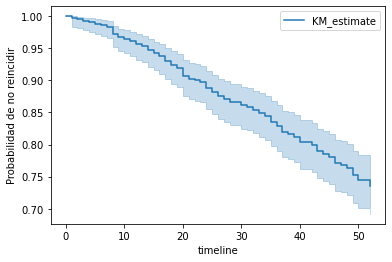

In [9]:
from lifelines import KaplanMeierFitter

kapmeier = KaplanMeierFitter()
kapmeier.fit(df['week'], event_observed=df['arrest'])
kapmeier.plot()
plt.ylabel("Probabilidad de no reincidir")

### Visualizando el efecto de una covariable a lo largo del tiempo

* Hasta el momento hemos modelado el riesgo del evento mediante la combinación lineal de los predictores. Dada la naturaleza semiparamétrica del modelo de riesgos proporcionales, podemos evaluar la evolución del riesgo para ciertos valores en la medida que pasa el tiempo.
* Una vez que ya estimamos el modelo de riesgos proporcionales, el objeto ofrece el método `plot_partial_effects_on_outcome`. Dentro de este método uno debe declarar dos argumentos: 1. la covariable a analizar, la cual debe estar presente en el modelo; 2. los puntajes donde evaluaremos el efecto de la variable a lo largo del tiempo.
* Para este caso analizaremos el efecto de la ayuda financiera en las tasas de encarcelamiento. En este caso el método devuelve tres escenarios: dos por los valores a evaluar y un punto basal que responde cuando nuestra combinación lineal de valores está en 0.
* Observamos que una vez que salen de la cárcel, todos los individuos parten con una probabilidad de no reincidir de 1. En la medida que el tiempo pasa, el riesgo de no reincidir en aquellos individuos sin ayuda financiera disminuye de una forma más acelerada que el grupo con ayuda financiera.

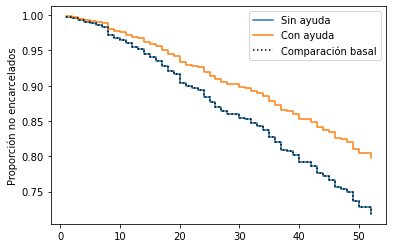

In [12]:
cox_ph.plot_partial_effects_on_outcome('fin', [0, 1])
plt.ylabel('Proporción no encarcelados')
plt.legend(['Sin ayuda', 'Con ayuda', 'Comparación basal'])

<AxesSubplot:>

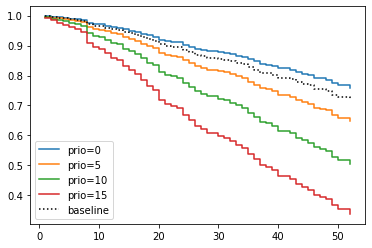

In [13]:
cox_ph.plot_partial_effects_on_outcome('prio', [0, 5, 10, 15])
#`prio`: Cantidad de encarcelamientos previos del individuo.

* Para analizar los riesgos en las covariables contínuas, se declara un array con cada valor a evaluar en  `plot_covariate_groups`. Vamos a graficar los riesgos para las otras dos variables "significativas".
* Observamos que cuando los individuos liberados no tienen encarcelamientos previos tienen mayores chances de no reincidir, en comparación a la categoría basal. 

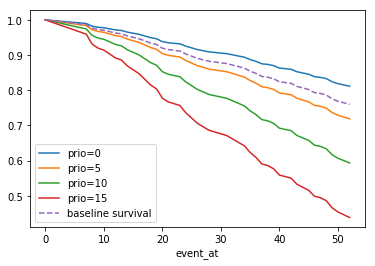

In [19]:
cox_ph.plot_covariate_groups('prio', [0, 5, 10, 15])

* De similar manera, se observa que individuos tienen mayores chances de reincidir.

<AxesSubplot:>

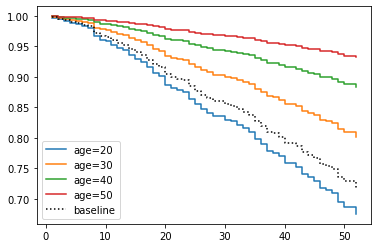

In [16]:
cox_ph.plot_partial_effects_on_outcome('age', [20, 30, 40, 50])

<AxesSubplot:>

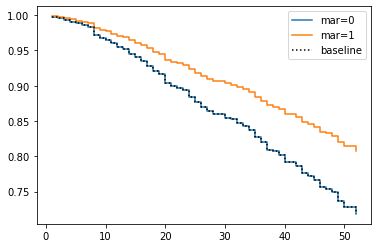

In [17]:
cox_ph.plot_partial_effects_on_outcome('mar', [0, 1])

<AxesSubplot:>

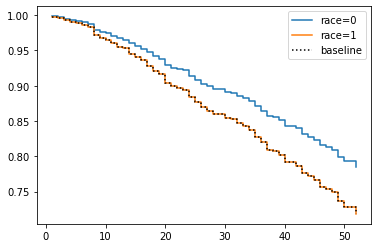

In [19]:
cox_ph.plot_partial_effects_on_outcome('race', [0, 1])

<AxesSubplot:>

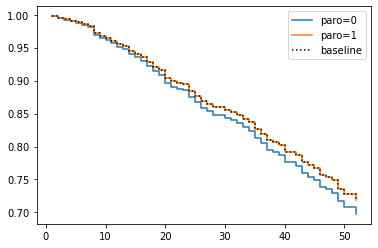

In [21]:
cox_ph.plot_partial_effects_on_outcome('paro', [0, 1])

<AxesSubplot:>

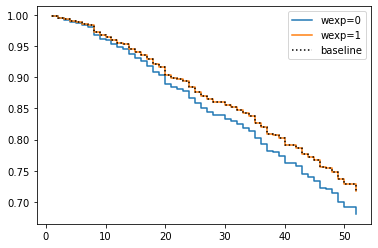

In [20]:
cox_ph.plot_partial_effects_on_outcome('wexp', [0, 1])